# Bank Marketing Data Analysis - Enhanced Version

## A Data-Driven Approach to Predict the Success of Bank Telemarketing

### Dataset Information:

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required to assess if the product (bank term deposit) would be subscribed.

**Dataset Used:** `bank-full.csv` - Contains all 45,211 examples with 16 input attributes plus the output attribute.

### Why bank-full.csv?
- **Complete Dataset**: Contains all examples (45,211 instances) vs. bank.csv which has only 10% (4,521 instances)
- **Better Model Performance**: Larger datasets generally lead to more robust and reliable machine learning models
- **Comprehensive Analysis**: Provides a complete view of the marketing campaign data

### Classification Goal:
Predict if the client will subscribe to a term deposit (variable 'y': yes/no)

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Enhanced visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

In [5]:
# Load the dataset with correct separator and quoting
df = pd.read_csv('bank-full.csv', sep=';', quotechar='"')

# Display basic dataset info in a clean, organized way
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Shape (rows, columns): {df.shape}")
print("\nColumn names & non-null counts:")
df.info()
print("-" * 60)

# First 10 rows in a nicely-formatted table
print("\nFirst 10 rows:")
display(df.head(10))

DATASET OVERVIEW
Shape (rows, columns): (45211, 17)

Column names & non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
--------------

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
# Dataset Information
print("Dataset Information:")
print(f"Shape: {df.shape}")
print("\nColumn names and types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
print("\nBasic statistics:")
display(df.describe())

# Check the target column name
print("\nColumn names:")
print(df.columns.tolist())

# Check unique values in the target column (should be 'y' not 'deposit')
if 'y' in df.columns:
    print("\nTarget variable 'y' unique values:")
    print(df['y'].value_counts())
elif 'deposit' in df.columns:
    print("\nTarget variable 'deposit' unique values:")
    print(df['deposit'].value_counts())
else:
    print("\nNeither 'y' nor 'deposit' found in columns")

Dataset Information:
Shape: (45211, 17)

Column names and types:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Missing values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Basic statistics:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000



Column names:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Target variable 'y' unique values:
y
no     39922
yes     5289
Name: count, dtype: int64


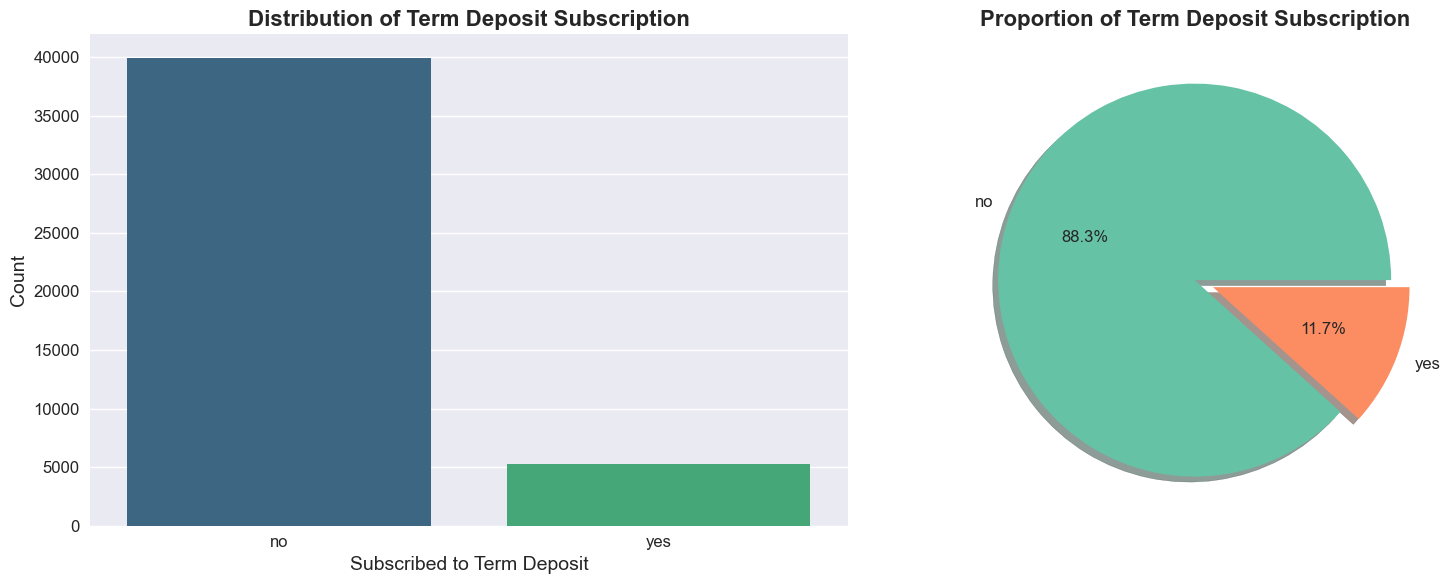

In [7]:
# Plotting the distribution of the target variable
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
sns.countplot(data=df, x='y', palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Term Deposit Subscription', fontweight='bold')
axes[0].set_xlabel('Subscribed to Term Deposit')
axes[0].set_ylabel('Count')

# Pie chart
df['y'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True, ax=axes[1])
axes[1].set_title('Proportion of Term Deposit Subscription', fontweight='bold')
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()

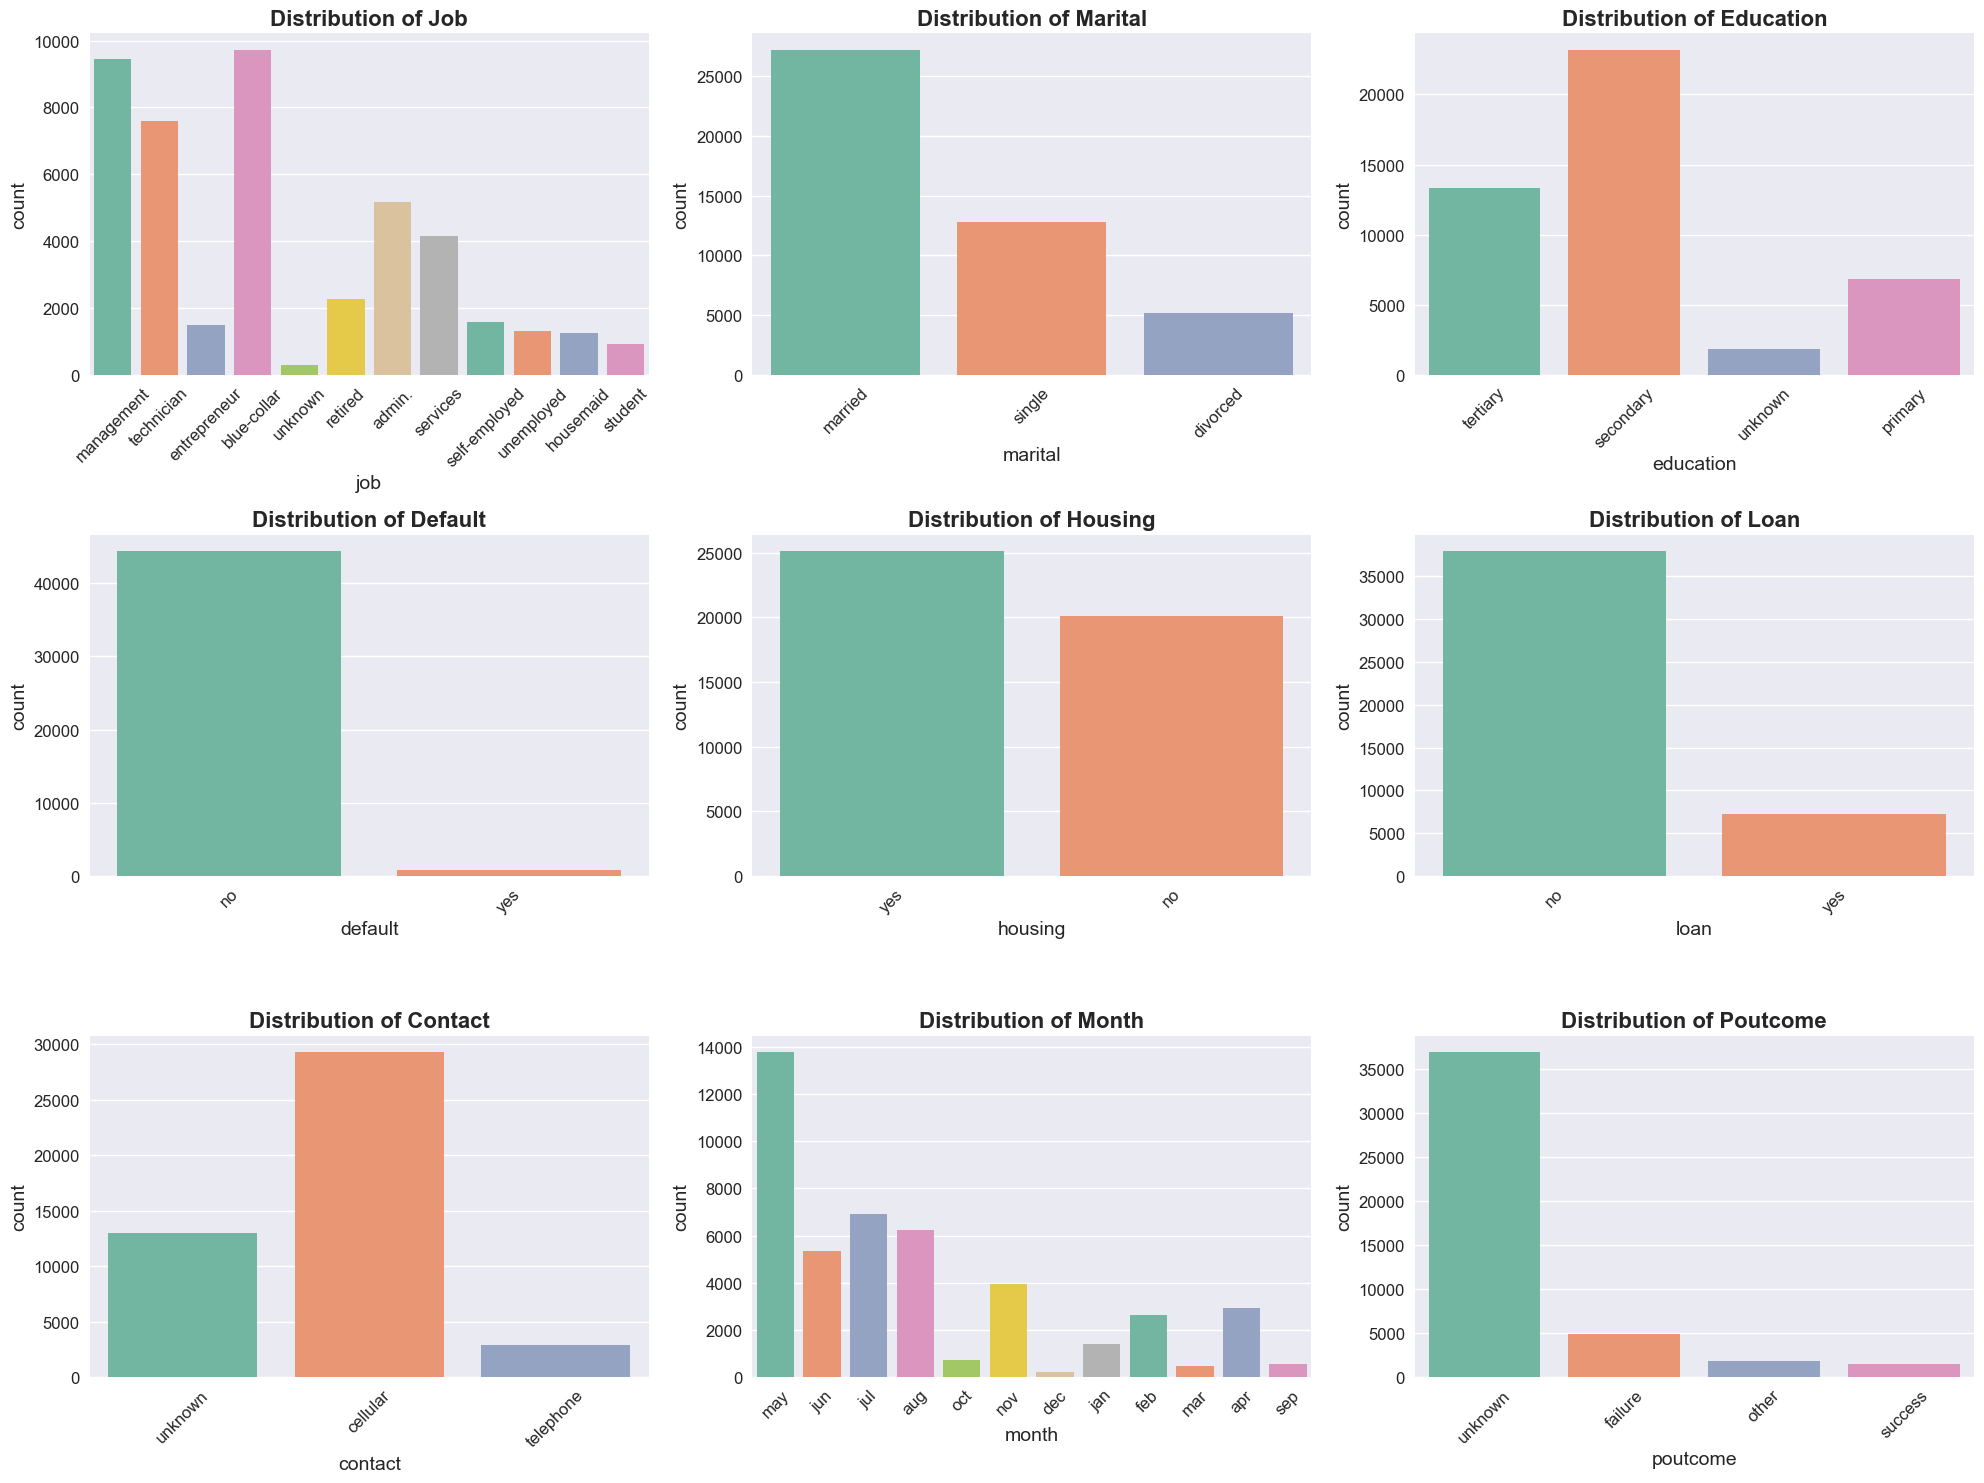

In [8]:
# Exploratory Data Analysis - Categorical Variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create subplots for categorical variables
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of {col.title()}', fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

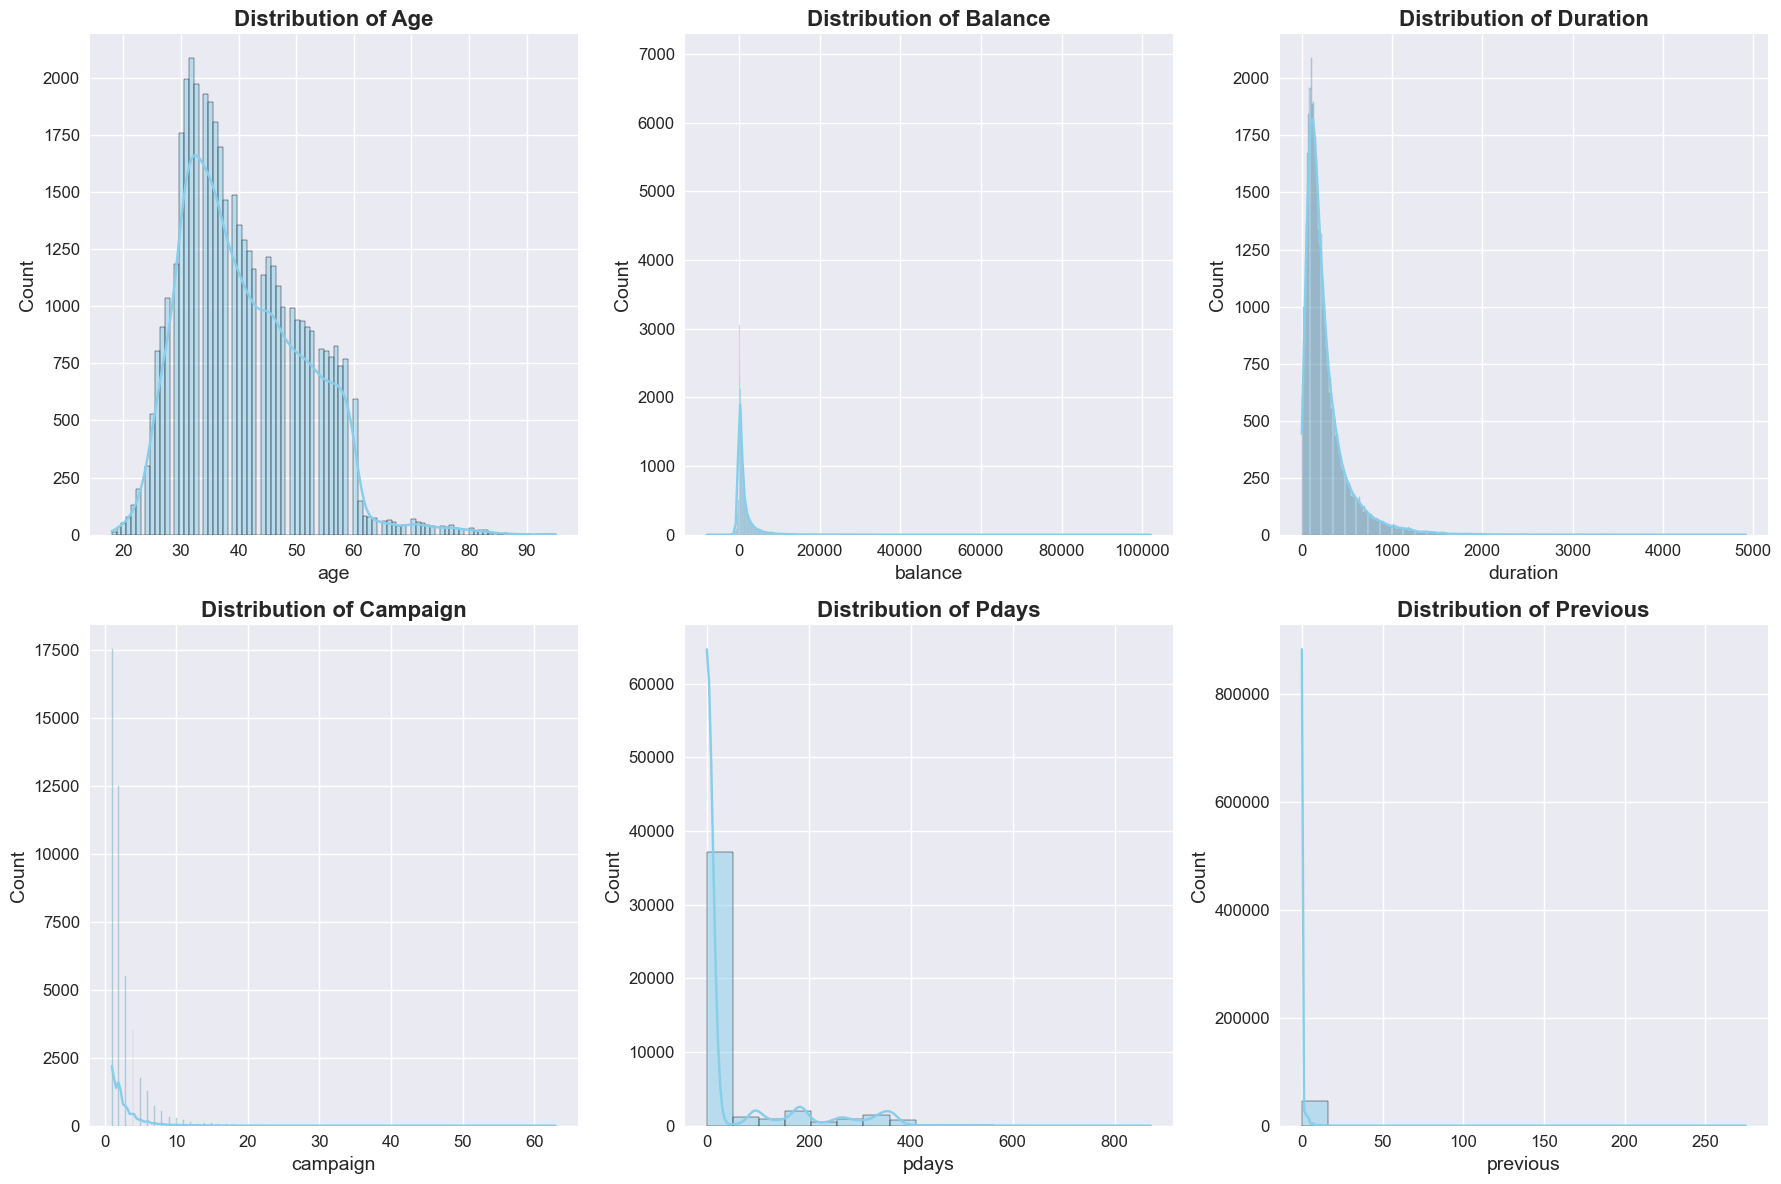

In [9]:
# Exploratory Data Analysis - Numerical Variables
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Create subplots for numerical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col.title()}', fontweight='bold')

plt.tight_layout()
plt.show()

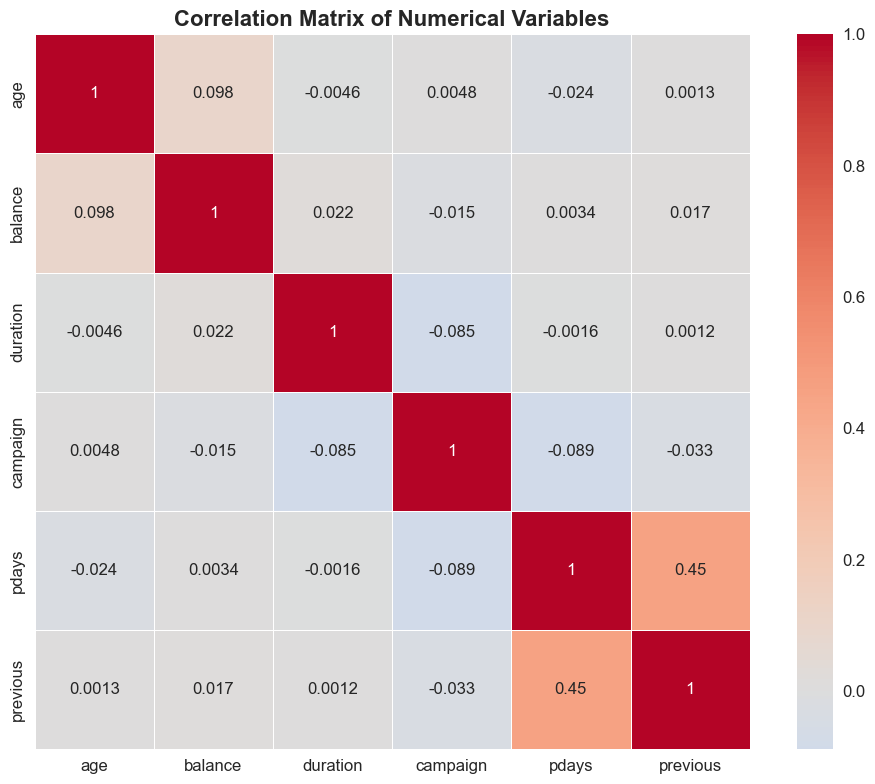

In [10]:
# Correlation Analysis
# Create a correlation matrix for numerical variables
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontweight='bold')
plt.tight_layout()
plt.show()

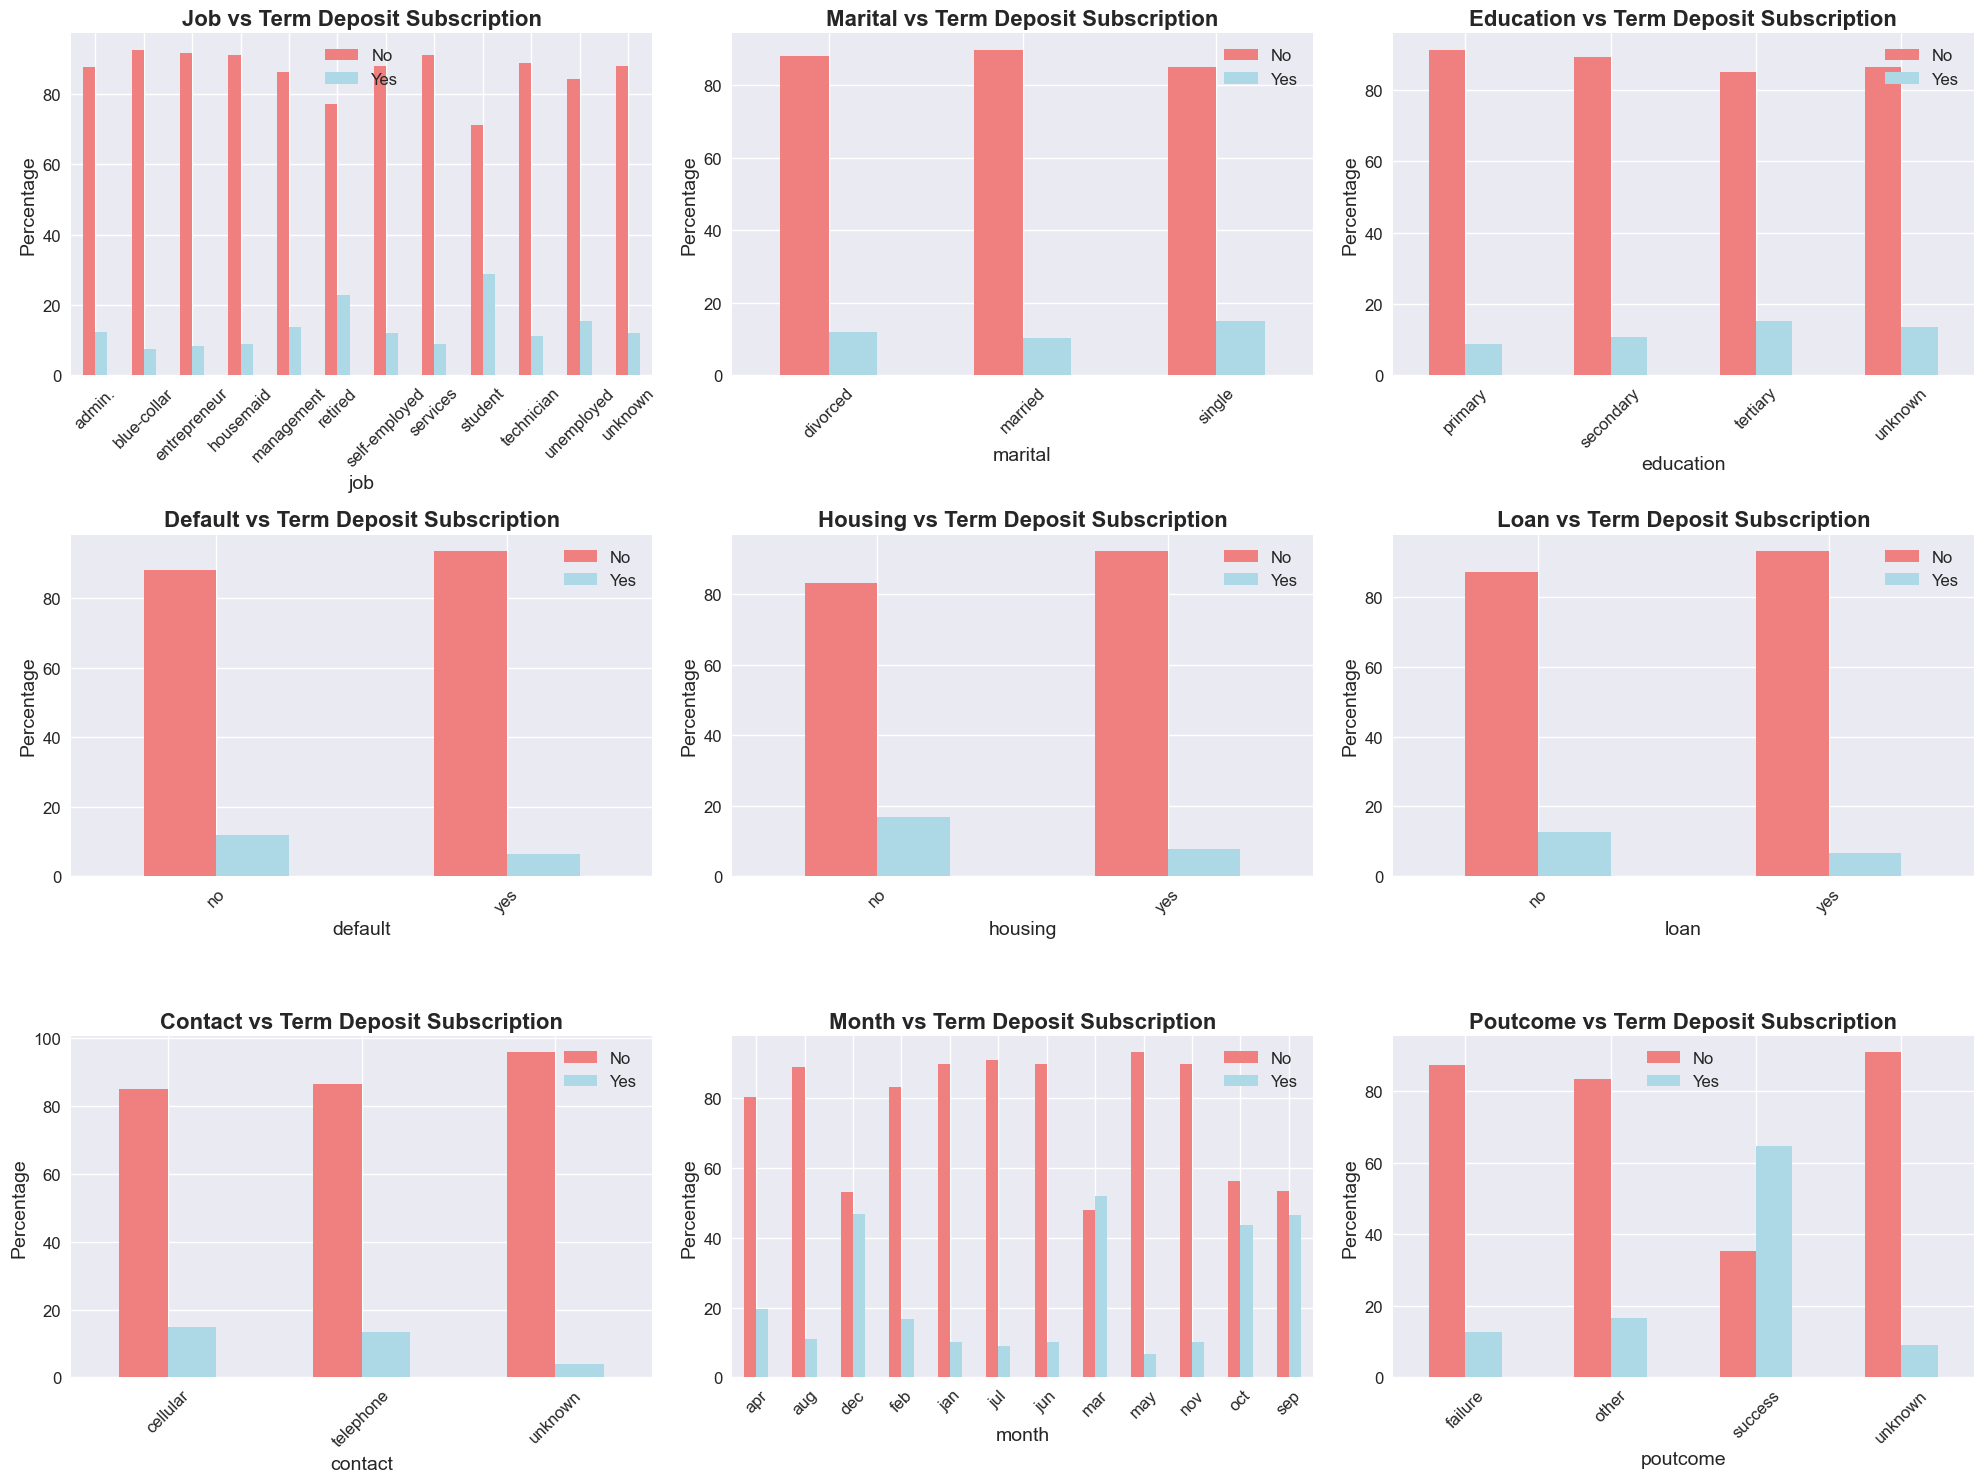

In [11]:
# Target Variable Analysis
# Analyze the relationship between categorical variables and target
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    cross_tab = pd.crosstab(df[col], df['y'], normalize='index') * 100
    cross_tab.plot(kind='bar', ax=axes[i], color=['lightcoral', 'lightblue'])
    axes[i].set_title(f'{col.title()} vs Term Deposit Subscription', fontweight='bold')
    axes[i].set_ylabel('Percentage')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(['No', 'Yes'])

plt.tight_layout()
plt.show()

In [12]:
# Data Preprocessing
# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

# Encode categorical variables
label_encoders = {}
categorical_columns = df_processed.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('y')  # Remove target variable

for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

# Encode target variable
target_encoder = LabelEncoder()
df_processed['y'] = target_encoder.fit_transform(df_processed['y'])

print("Data preprocessing completed!")
print(f"Processed dataset shape: {df_processed.shape}")
print(f"Target variable encoding: {dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))}")

Data preprocessing completed!
Processed dataset shape: (45211, 17)
Target variable encoding: {'no': 0, 'yes': 1}


In [13]:
# Save the processed dataframe to a new CSV file
df_processed.to_csv('bank-full_processed.csv', index=False)
print('Processed data saved to bank-full_processed.csv')
print(f'Processed dataset shape: {df_processed.shape}')
print('\nFirst 5 rows of processed data:')
display(df_processed.head())

Processed data saved to bank-full_processed.csv
Processed dataset shape: (45211, 17)

First 5 rows of processed data:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [14]:
# Feature Selection and Model Training
# Separate features and target
X = df_processed.drop('y', axis=1)
y = df_processed['y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Target distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))

Training set shape: (36168, 16)
Test set shape: (9043, 16)
Target distribution in training set:
y
0    0.883018
1    0.116982
Name: proportion, dtype: float64


In [15]:
# Model Training and Evaluation
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_scaled)
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluate models
print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions, target_names=['No', 'Yes']))

print("\n" + "="*50)
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_predictions, target_names=['No', 'Yes']))

Random Forest Classifier Results:
Accuracy: 0.9064

Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.97      0.95      7985
         Yes       0.66      0.42      0.51      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.70      0.73      9043
weighted avg       0.90      0.91      0.90      9043


Logistic Regression Results:
Accuracy: 0.8914

Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.98      0.94      7985
         Yes       0.59      0.23      0.33      1058

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



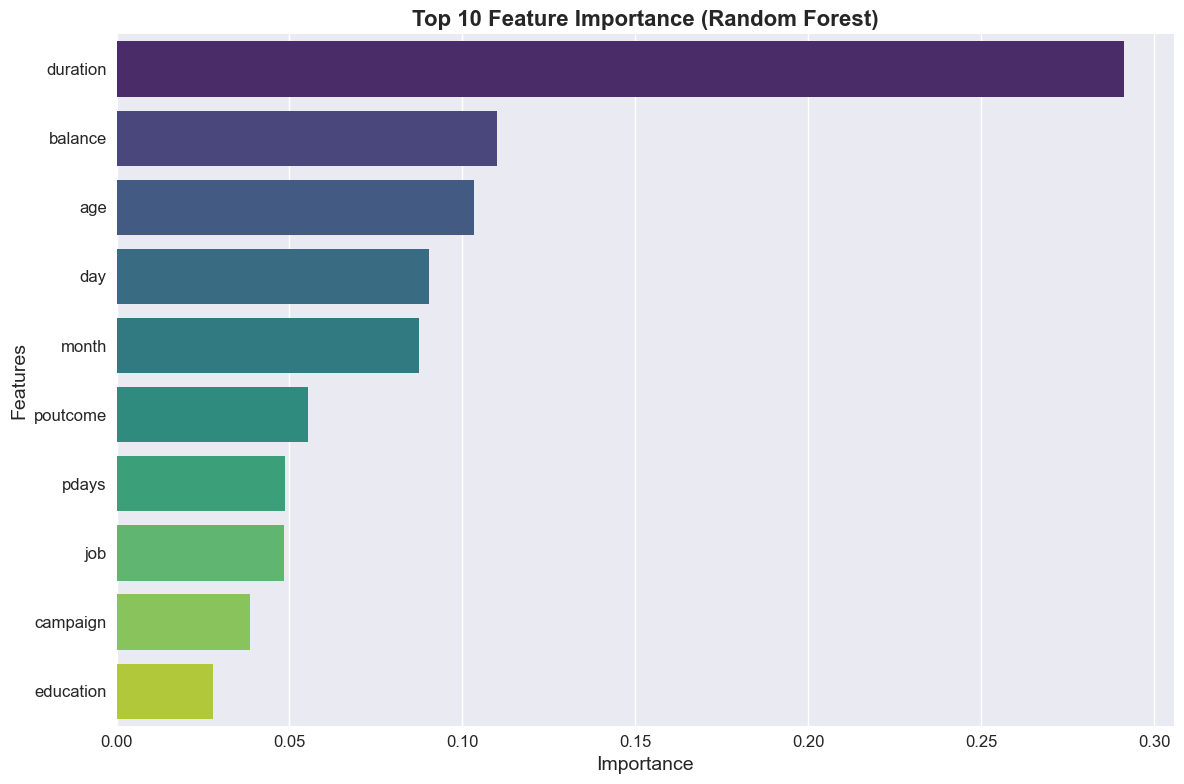

Top 10 Most Important Features:
      feature  importance
11   duration    0.291153
5     balance    0.110084
0         age    0.103281
9         day    0.090262
10      month    0.087403
15   poutcome    0.055356
13      pdays    0.048788
1         job    0.048493
12   campaign    0.038565
3   education    0.027879


In [16]:
# Feature Importance Analysis
# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature', palette='viridis')
plt.title('Top 10 Feature Importance (Random Forest)', fontweight='bold')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

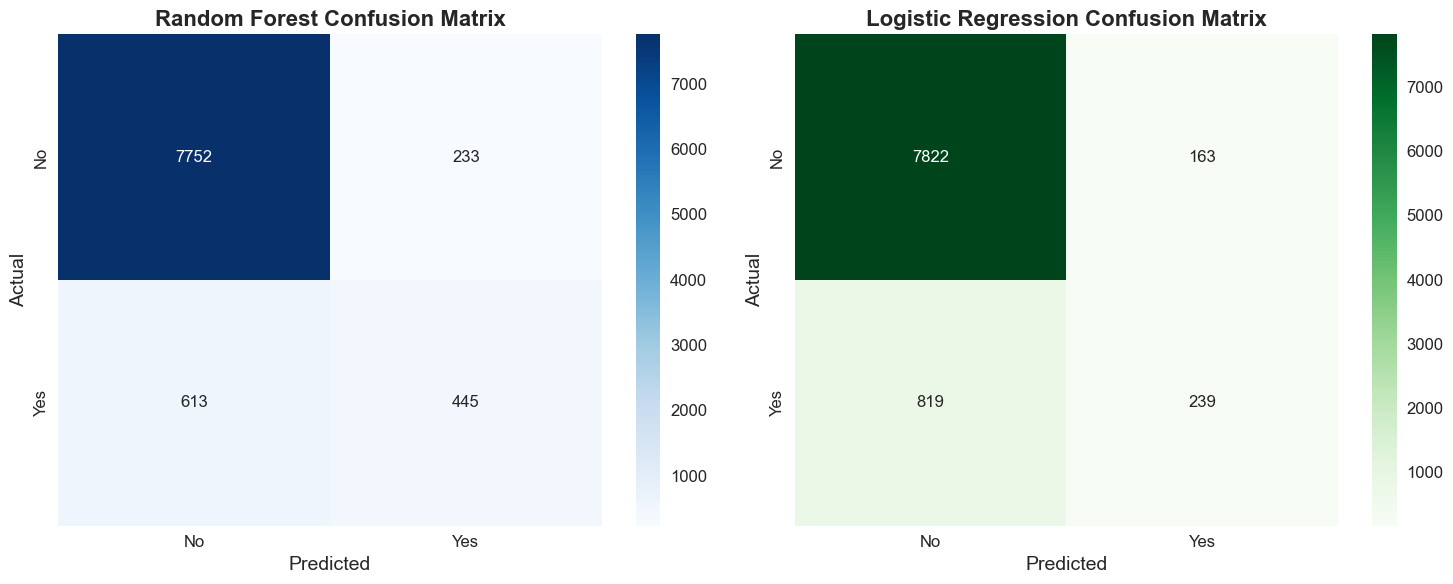

In [17]:
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
axes[0].set_title('Random Forest Confusion Matrix', fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Logistic Regression Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
axes[1].set_title('Logistic Regression Confusion Matrix', fontweight='bold')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()